# 🖼️ Exploratory Data Analysis (EDA) of CIFAR-10 Dataset

## Import Necessary libs and Dataset

In [11]:

from tensorflow.keras.datasets import cifar10 # 📥 Load CIFAR-10 dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load Data

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [13]:
# Flatten y for easier handling
y_train = y_train.flatten()
y_test = y_test.flatten()

In [14]:
# CIFAR-10 class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

## Dataset summary

In [15]:
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]}")

Training samples: 50000
Test samples: 10000
Image shape: (32, 32, 3)


## 🖼️ Display a grid of sample images

In [16]:
def plot_sample_images(X, y, class_labels, samples_per_class=10):
    plt.figure(figsize=(15, 10))
    for class_idx in range(len(class_labels)):
        idxs = np.flatnonzero(y == class_idx)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * len(class_labels) + class_idx + 1
            plt.subplot(samples_per_class, len(class_labels), plt_idx)
            plt.imshow(X[idx])
            plt.axis('off')
            if i == 0:
                plt.title(class_labels[class_idx])
    plt.show()

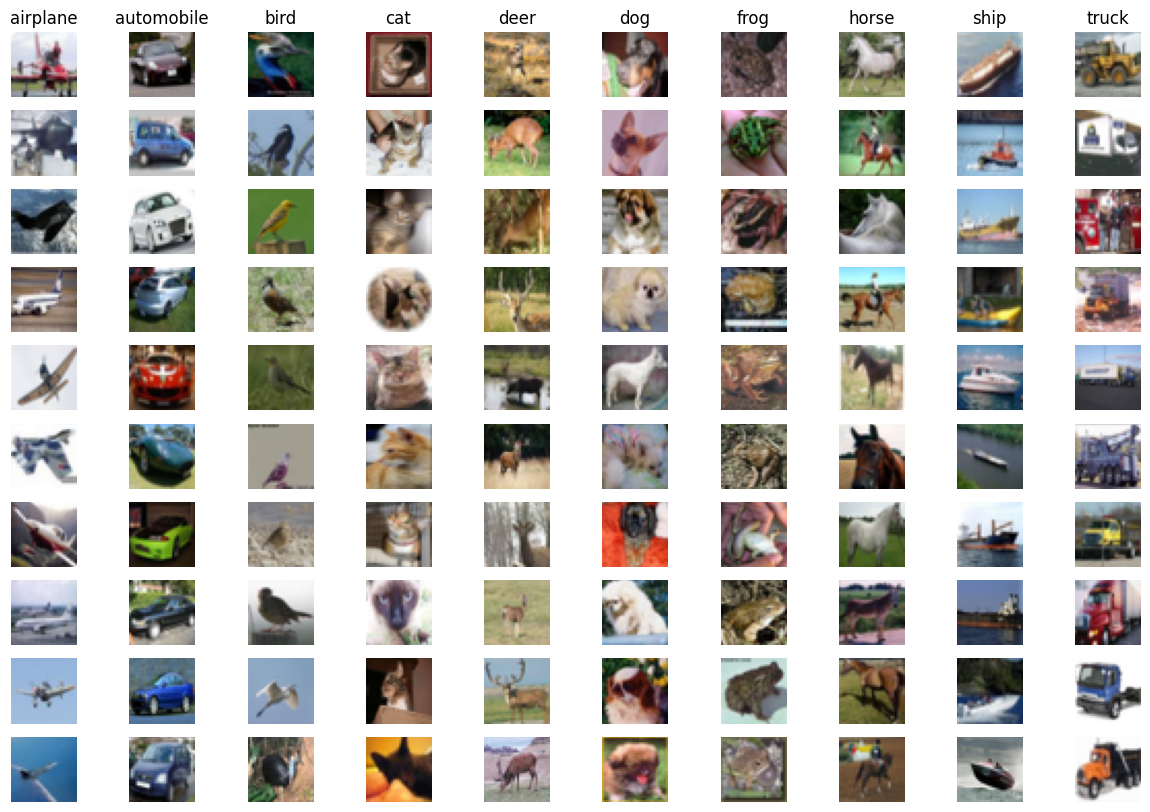

In [17]:
plot_sample_images(X_train, y_train, class_labels)

## 📊 Plot class distribution

/var/folders/v_/z8qwlrbj7473y11zhtv8x26w0000gn/T/ipykernel_21326/3265554716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set3")


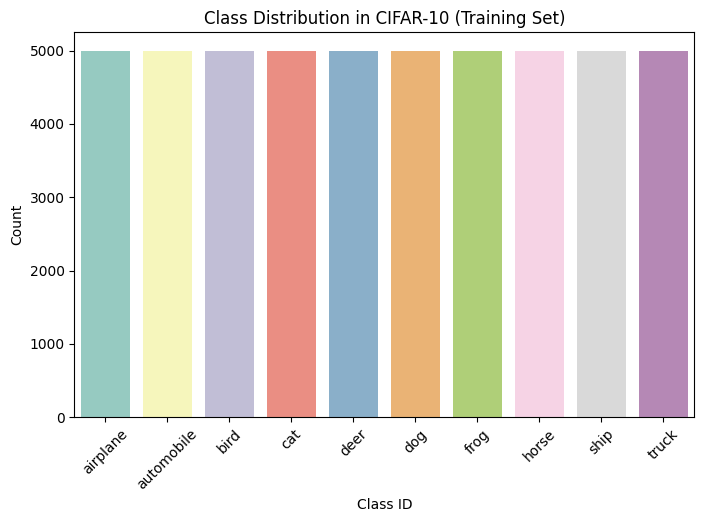

In [18]:

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette="Set3")
plt.title("Class Distribution in CIFAR-10 (Training Set)")
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(10), labels=class_labels, rotation=45)
plt.show()

## 🖼️ Display mean image per class

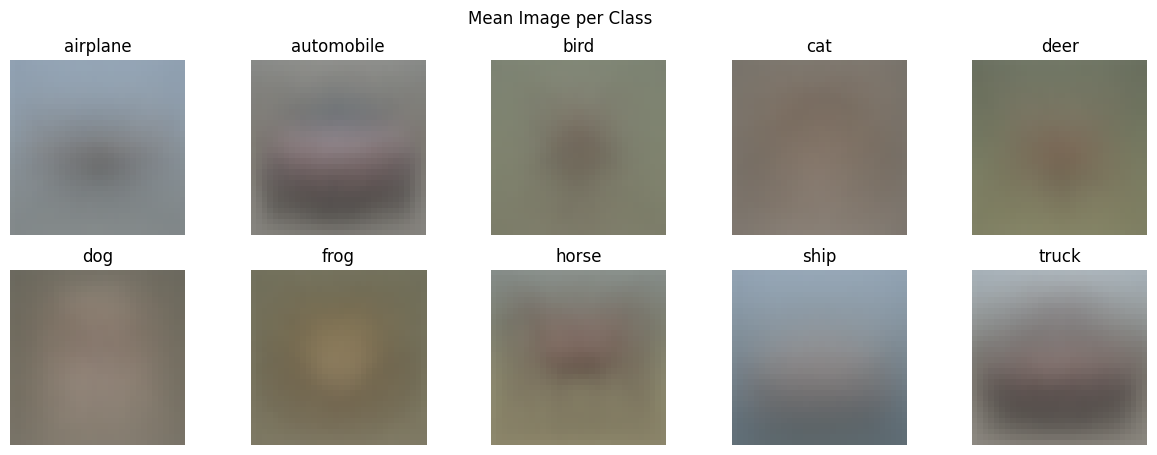

In [19]:

mean_images = []
plt.figure(figsize=(15, 5))
for i in range(10):
    mean_img = np.mean(X_train[y_train == i], axis=0).astype(np.uint8)
    mean_images.append(mean_img)
    plt.subplot(2, 5, i+1)
    plt.imshow(mean_img)
    plt.title(class_labels[i])
    plt.axis('off')
plt.suptitle("Mean Image per Class")
plt.show()


## 🖼️ Display standard deviation images per class

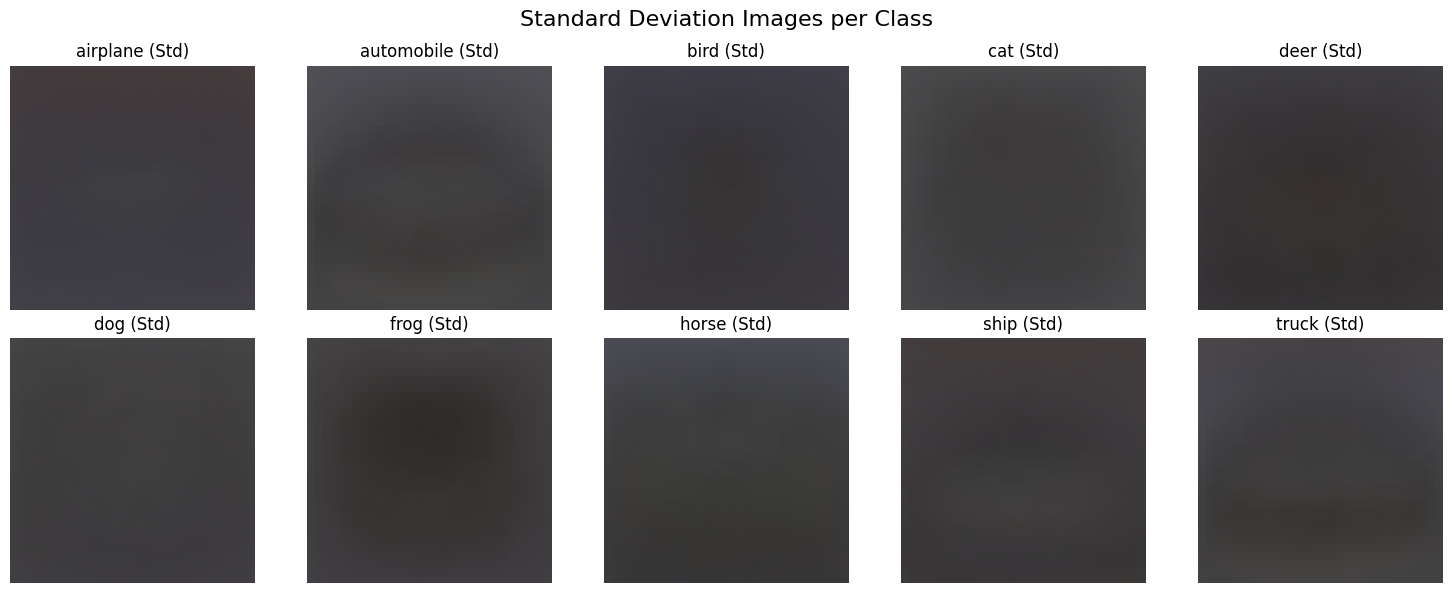

In [21]:
# 🖼️ Display standard deviation images per class
plt.figure(figsize=(15, 6))
for i in range(10):
    # Seleciona todas as imagens da classe i
    class_images = X_train[y_train == i]
    
    # Calcula o desvio padrão pixel a pixel
    std_img = np.std(class_images, axis=0).astype(np.uint8)
    
    # Plota a imagem de desvio padrão
    plt.subplot(2, 5, i+1)
    plt.imshow(std_img)
    plt.title(f"{class_labels[i]} (Std)")
    plt.axis('off')

plt.suptitle("Standard Deviation Images per Class", fontsize=16)
plt.tight_layout()
plt.show()


## 🖼️ Display standard deviation heatmaps per class

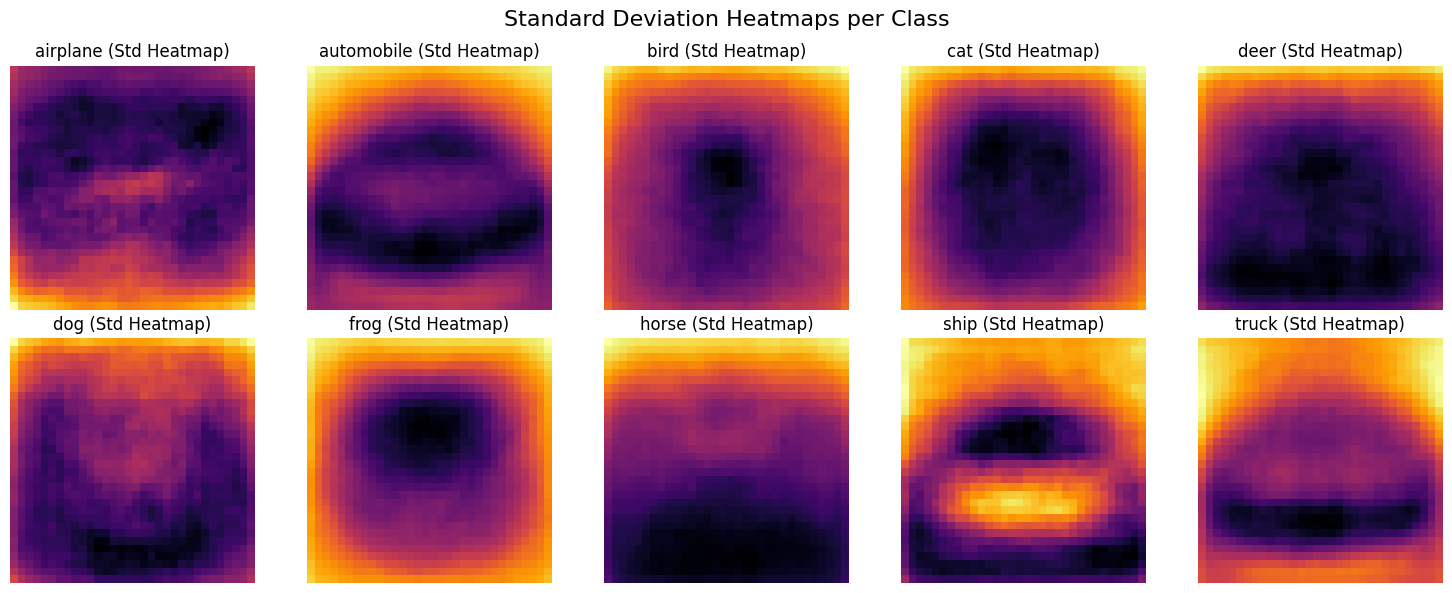

In [ ]:

plt.figure(figsize=(15, 6))
for i in range(10):
    # Seleciona todas as imagens da classe i
    class_images = X_train[y_train == i]
    
    # Calcula o desvio padrão pixel a pixel e agrega sobre os canais RGB
    std_img = np.std(class_images, axis=0)  # shape: (32, 32, 3)
    std_img_gray = np.mean(std_img, axis=2)  # shape: (32, 32)
    
    # Plota o heatmap
    plt.subplot(2, 5, i+1)
    plt.imshow(std_img_gray, cmap='inferno')  # usar colormap 'inferno' ou 'viridis'
    plt.title(f"{class_labels[i]} (Std Heatmap)")
    plt.axis('off')

plt.suptitle("Standard Deviation Heatmaps per Class", fontsize=16)
plt.tight_layout()
plt.show()
